In [1]:
%load_ext rpy2.ipython

Protocol used by Albertas to make this data: https://benchling.com/anavickas/f/lib_VNejBHt6-protocols/prt_2Bkfh557-meripseq/edit

HIV-1 IIIB Virus


https://aidsreagent.org/reagentdetail.cfm?t=viruses&id=607

We are starting from `fastq` files as raw data: 

## Trimming 

In [ ]:
%%bash 
cd ~/People/Judd/fastq
for f in *_L002_R1_001.fastq.gz; do  
    out=${f/\_S[1-9]*/.trim.fastq.gz}; 
    cutadapt -j 12 -q 15 -m 20 -a NNNAGATCGGAAGAGCACACGTCTGAACTCCAGTCA -o ../trim/$out $f; 
done

## Alignment

Unmmaped reads for each `fastq` file saved for later alignment to HIV genome 

Human genome: `gencode.v28.annotation.gtf`

In [ ]:
%%bash 
STAR --genomeLoad LoadAndExit --genomeDir /rumi/shams/abe/genomes/hg38/
for f in trim/*.fastq.gz;do
    out=${f/.trim.fastq.gz/_};
    out=${out/trim/bam};
    STAR --outSAMtype BAM SortedByCoordinate --readFilesCommand zcat --runThreadN 16 --genomeDir /rumi/shams/abe/genomes/hg38/ --readFilesIn $f --outFileNamePrefix $out --outReadsUnmapped Fastx;
done
STAR --genomeLoad Remove --genomeDir /rumi/shams/abe/genomes/hg38/

Firstly, HIV genome indices created by changing sequence provided by Judd to `.fa` format. It didn't work as we needed gtf file! 

Ok! I'm switching to the [HIV-1 clone pIIIB from USA, complete genome
](https://www.ncbi.nlm.nih.gov/nucleotide/EU541617.1?report=genbank&log$=nuclalign&blast_rank=1&RID=8B8ETWT201R) which is highly matched with Judd's clone (using Blast alignment). Then, I donwloaded `.fa` and `.gff3` format for downstream analysis. 

In [47]:
%%bash 
# # make hiv genome indices 
# bowtie2-build HIV/EU541617.1/EU541617.1.fasta HIV/EU541617.1/index
# # Aligning to hiv genome 
# for f in fastq_unmapped/*; do
# 	o=${f/.fastq/.bam};
#  	o=${o/fastq_unmapped/bam};
#  	bowtie2 --sensitive -N 1 -x HIV/EU541617.1/index -U $f | samtools sort -o $o;
# done

In [48]:
%%bash
# use STAR 
STAR --runThreadN 16 \
--runMode genomeGenerate \
--genomeDir HIV/EU541617.1/ \
--genomeFastaFiles HIV/EU541617.1/EU541617.1.fasta \
--sjdbGTFfile HIV/EU541617.1/EU541617.1.gff3 \
--sjdbOverhang 99 --genomeSAindexNbases 8 --sjdbGTFfeatureExon CDS

Apr 03 03:33:26 ..... started STAR run
Apr 03 03:33:26 ... starting to generate Genome files
Apr 03 03:33:26 ... starting to sort Suffix Array. This may take a long time...
Apr 03 03:33:26 ... sorting Suffix Array chunks and saving them to disk...
Apr 03 03:33:26 ... loading chunks from disk, packing SA...
Apr 03 03:33:26 ... finished generating suffix array
Apr 03 03:33:26 ... generating Suffix Array index
Apr 03 03:33:26 ... completed Suffix Array index
Apr 03 03:33:26 ..... processing annotations GTF
Apr 03 03:33:26 ... writing Genome to disk ...
Apr 03 03:33:26 ... writing Suffix Array to disk ...
Apr 03 03:33:26 ... writing SAindex to disk
Apr 03 03:33:26 ..... finished successfully


In [60]:
%%bash
# STAR --genomeLoad LoadAndExit --genomeDir HIV/EU541617.1/
for f in fastq_unmapped/*; do
	o=${f/.fastq/.bam};
	o=${o/fastq_unmapped/bam};
	echo STAR --outSAMtype BAM SortedByCoordinate --readFilesCommand cat --runThreadN 16 --genomeDir HIV/EU541617.1/ --readFilesIn $f --outFileNamePrefix $o --limitBAMsortRAM 1000000000;
# 	STAR --outSAMtype BAM SortedByCoordinate --readFilesCommand cat --runThreadN 16 --genomeDir HIV/EU541617.1/ --readFilesIn $f --outFileNamePrefix $o --limitBAMsortRAM 1000000000;
done
# STAR --genomeLoad Remove --genomeDir HIV/EU541617.1/

STAR --outSAMtype BAM SortedByCoordinate --readFilesCommand cat --runThreadN 16 --genomeDir HIV/EU541617.1/ --readFilesIn fastq_unmapped/s23.hiv.METTL14.input.fastq --outFileNamePrefix bam/s23.hiv.METTL14.input.bam --limitBAMsortRAM 1000000000
STAR --outSAMtype BAM SortedByCoordinate --readFilesCommand cat --runThreadN 16 --genomeDir HIV/EU541617.1/ --readFilesIn fastq_unmapped/s23.hiv.METTL14.m6A.fastq --outFileNamePrefix bam/s23.hiv.METTL14.m6A.bam --limitBAMsortRAM 1000000000
STAR --outSAMtype BAM SortedByCoordinate --readFilesCommand cat --runThreadN 16 --genomeDir HIV/EU541617.1/ --readFilesIn fastq_unmapped/s23.hiv.METTL3.input.fastq --outFileNamePrefix bam/s23.hiv.METTL3.input.bam --limitBAMsortRAM 1000000000
STAR --outSAMtype BAM SortedByCoordinate --readFilesCommand cat --runThreadN 16 --genomeDir HIV/EU541617.1/ --readFilesIn fastq_unmapped/s23.hiv.METTL3.m6A.fastq --outFileNamePrefix bam/s23.hiv.METTL3.m6A.bam --limitBAMsortRAM 1000000000
STAR --outSAMtype BAM SortedByCoordi

In [65]:
%%bash 
for f in bam/*Aligned.sortedByCoord.out.bam; do o=${f/Aligned.sortedByCoord.out.bam/}; mv -v $f $o; done 

renamed 'bam/s23.hiv.METTL14.input.bamAligned.sortedByCoord.out.bam' -> 'bam/s23.hiv.METTL14.input.bam'
renamed 'bam/s23.hiv.METTL14.m6A.bamAligned.sortedByCoord.out.bam' -> 'bam/s23.hiv.METTL14.m6A.bam'
renamed 'bam/s23.hiv.METTL3.input.bamAligned.sortedByCoord.out.bam' -> 'bam/s23.hiv.METTL3.input.bam'
renamed 'bam/s23.hiv.METTL3.m6A.bamAligned.sortedByCoord.out.bam' -> 'bam/s23.hiv.METTL3.m6A.bam'
renamed 'bam/s23.hiv.NT.input.bamAligned.sortedByCoord.out.bam' -> 'bam/s23.hiv.NT.input.bam'
renamed 'bam/s23.hiv.NT.m6A.bamAligned.sortedByCoord.out.bam' -> 'bam/s23.hiv.NT.m6A.bam'
renamed 'bam/s23.hiv.Virma.input.bamAligned.sortedByCoord.out.bam' -> 'bam/s23.hiv.Virma.input.bam'
renamed 'bam/s23.hiv.Virma.m6A.bamAligned.sortedByCoord.out.bam' -> 'bam/s23.hiv.Virma.m6A.bam'
renamed 'bam/s23.hiv.WTAP.input.bamAligned.sortedByCoord.out.bam' -> 'bam/s23.hiv.WTAP.input.bam'
renamed 'bam/s23.hiv.WTAP.m6A.bamAligned.sortedByCoord.out.bam' -> 'bam/s23.hiv.WTAP.m6A.bam'
renamed 'bam/s24.hiv.MET

All `bam`  files (mapped to human genome or hiv genome) renamed in this format: 
> `<sample>.<species>.<treatment>.<input/m6A>.bam`

### Id transfer 
Read gene names from `gtf` file

In [10]:
import pandas as pd 
import os
import feather as ft


def gtf_id_transfer(gtf):
    # awk code to extract gene ID and Name 
    gtf_raw = os.popen("cat " + gtf + " | awk 'BEGIN{FS=\"\t\"}{split($9,a,\";\"); if($3~\"gene\") print a[1]\"\t\"a[3]}' | sed 's/gene_id \"//' | sed 's/gene_name \"//' | sed 's/\"//g' | sed 's/ //g'").read().split('\n')
    # data frame 
    gtf_df = pd.DataFrame(
        # col: Names 
        data=[i.split('\t') for i in gtf_raw[:len(gtf_raw)-1]],
#         # index: ids 
#         index=[i.split('\t')[0] for i in gtf_raw[:len(gtf_raw)-1]],
        columns=['ID','Name'], dtype=str)
    return gtf_df

gtf = '/rumi/shams/genomes/hg38/gencode.v28.annotation.gtf'
gtf_df = gtf_id_transfer(gtf)

# pass data between R and Python using feather-format
ft.write_dataframe(gtf_df, 'gtf_df.ft')

In [ ]:
%%R 
library(feather)
gtf_df = read_feather('gtf_df.ft') %>% remove_rownames %>% column_to_rownames(var="ID")

# Peakcalling 

## Control

Comparing to RADAR package, exomepeak also claculate coverage for only non threted samples. We used different conda `environment` for exomepeak (and it takes long time to run!!). 

In [ ]:
library(exomePeak)
txdb <- makeTxDbFromGFF('/rumi/shams/genomes/hg38/gencode.v28.annotation.gtf',organism='Homo sapiens')
setwd("/rumi/shams/abe/People/Judd/bam")
print (txdb)
res <- exomepeak(
    TXDB=txdb,
    IP_BAM=list.files(pattern='human.NT.m6A.bam$'),
    INPUT_BAM=list.files(pattern='human.NT.input.bam$'),
    OUTPUT_DIR='../exomepeak',
    EXPERIMENT_NAME='control'
)
saveRDS(res, paste('../exomepeak','control', 'results.rds', sep='/'))

### Plot _Guitar_ 
Now, let's draw metagene plots for control samples:
(using seprate env: `Guitar`)

In [7]:
%reload_ext rpy2.ipython

In [6]:
%%R
library(Guitar)

In [4]:
%%R
txdb <- makeTxDbFromGFF('/rumi/shams/genomes/hg38/gencode.v28.annotation.gtf',organism='Homo sapiens')

R[write to console]: Import genomic features from the file as a GRanges object ... 
R[write to console]: OK

R[write to console]: Prepare the 'metadata' data frame ... 
R[write to console]: OK

R[write to console]: Make the TxDb object ... 
R[write to console]: OK



In [5]:
%%R
GuitarPlot(txTxdb = txdb,stBedFiles = list("exomepeak/control/peak.bed"),miscOutFilePrefix = "control")

[1] "20200325183907"
[1] "There are 203835 transcripts of 58381 genes in the genome."
[1] "total 203835 transcripts extracted ..."
[1] "total 94682 transcripts left after ambiguity filter ..."
[1] "total 94682 transcripts left after check chromosome validity ..."
[1] "total 11625 mRNAs left after component length filter ..."
[1] "total 56222 ncRNAs left after ncRNA length filter ..."
[1] "generate components for all tx"
[1] "generate components for mRNA"
[1] "generate components for lncRNA"
[1] "generate chiped transcriptome"
[1] "generate coverage checking ranges for tx"
[1] "generate coverage checking ranges for mrna"
[1] "generate coverage checking ranges for ncrna"
[1] "20200325184342"
[1] "import BED file exomepeak/control/peak.bed"
[1] "sample 10 points for Group1"
[1] "start figure plotting for tx ..."
[1] "start figure plotting for mrna ..."
[1] "start figure plotting for ncrna ..."


In [ ]:
# !magick -density 300 plots/control_mrna_test.pdf -flatten -quality 90 plots/control_mrna_test.png

### Motif analysis 

In [ ]:
%%bash 
cd exomepeak/control/
bedtools getfasta -name -s -fi /rumi/shams/genomes/hg38/hg38.fa -bed peak.bed -split -fo peak.fa
# prepare fasta file for FIRE
perl /flash/hani/bin/Tools/prep_seqs_for_teiser_run.pl peak.fa peaks
# run FIRE --doskipdiscovery=1
perl $FIREDIR/fire.pl --expfile=peaks_teiser.txt --exptype=discrete --fastafile_rna=peaks_teiser.fa --nodups=1 --dodna=0 --dodnarna=0 --species=human --doskipdiscovery=1 --motiffile_rna=motifs_of_interest.txt --oribiasonly=0
mv peaks_teiser.txt_FIRE/ motifs_of_interest_FIRE
# run FIRE --doskipdiscovery=0
perl $FIREDIR/fire.pl --expfile=peaks_teiser.txt --exptype=discrete --fastafile_rna=peaks_teiser.fa --nodups=1 --dodna=0 --dodnarna=0 --species=human --oribiasonly=0

# Running a custom pipeline 

Here we're using https://github.com/gold-lab/bed12ToGTF to make gtf file from control exomepeak result.

https://metacpan.org/pod/Bio::FeatureIO::gtf

In [243]:
%%bash
cat exomepeak/control/peak.bed | sort -k4 | \
# rename features peak by peak
awk -F "\t" '{OFS=FS}NR>1{$4=$4"_peak"}; cnt[$4]++{$4=$4"_"cnt[$4]} 1' | \
# bed12 to gtf
perl ../../Workflows/bed12ToGTF/bed12ToGTF.1.pl | \
awk '{gsub(/\"|\;/,"")}1''{gsub(/transcript_id/,"gene_id")}1''{gsub(/ exon_number [[:digit:]]/,"")}1' > exomepeak/control/peak.gtf

Using `featureCounts` to count reads which are present in control peak cordinates (found by `exomepeak`). 

In [244]:
%%bash
declare -a StringArray=('METTL14' 'METTL3' 'Virma' 'WTAP')
for enz in "${StringArray[@]}"; 
    do for f in bam/*human.$enz*.bam; 
        do out=${f/.bam/.fc}; out=${out/bam/peakcount}; 
            featureCounts -T 12 -O -t exon -g gene_id -a exomepeak/control/peak.gtf -o $out $f; 
    done;
done


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v1.6.0

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 1 BAM file                                       ||
||                           S bam/s23.human.METTL14.input.bam                ||
||                                                                            ||
||             Output file : peakcount/s23.human.METTL14.input.fc             ||
||                 Summary : peakcount/s23.human.METTL14.input.fc

In [10]:
%%bash 
for f in bam/*human.NT*.bam; do 
    out=${f/.bam/.fc}; out=${out/bam/peakcount}; 
    featureCounts -T 12 -O -t exon -g gene_id -a exomepeak/control/peak.gtf -o $out $f; 
done


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v1.6.0

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 1 BAM file                                       ||
||                           S bam/s23.human.NT.input.bam                     ||
||                                                                            ||
||             Output file : peakcount/s23.human.NT.input.fc                  ||
||                 Summary : peakcount/s23.human.NT.input.fc.summ

## Differential methylation

In [11]:
%reload_ext rpy2.ipython

In [121]:
%%R 
library(DESeq2)
library(tidyverse)
library(ggplot2)
require(ggrepel)
library(patchwork)
library(feather)
gtf_df = read_feather('gtf_df.ft') %>% remove_rownames %>% column_to_rownames(var="ID")

pca = list(); vol = list(); hist = list()

using `DESeq2` to find differential methylation peaks: 

### Contrast design: $\frac{m6A^{treated}}{input^{treated}}$ vs.$\frac{m6A^{nontreated}}{input^{nontreated}}$

In [118]:
%%R
all_dds = list()
all_res = list()
for (treat in c('METTL14','METTL3','Virma','WTAP'
               )){
    treat.input <- list.files(path = 'peakcount',pattern=paste('human.',treat,".input.fc$",sep = ''))
    treat.m6A <- list.files(path = 'peakcount',pattern=paste('human.',treat,".m6A.fc$",sep = ''))
    
    n_treat.input <- list.files(path = 'peakcount',pattern=paste("human.NT.input.fc$",sep = ''))
    n_treat.m6A <- list.files(path = 'peakcount',pattern=paste("human.NT.m6A.fc$",sep = ''))
    
    files = c(treat.input, treat.m6A, n_treat.input, n_treat.m6A)
    # meta
    reps <- rep(c('s23','s24'),2)
    ip <- c(rep('input',2),rep('m6A',2))
    conds <- c(paste(treat,ip, sep='.'), paste('NT',ip, sep='.'))
    all_conds <- c(paste(reps,treat,ip, sep='.'), paste(reps,'NT',ip, sep='.'))
    datalist <- lapply(files, function(x){read.table(file=paste('peakcount/', x, sep = ""),skip=1,sep='\t',header=TRUE,colClasses=c(NA, "NULL", "NULL", "NULL", "NULL", "NULL", NA),check.names=F)})
    m <- Reduce(function(...) merge(..., by=1, all = TRUE), datalist)
    rownames(m) <- m[,1]
    m <- m[,-1]
    m[is.na(m)]<-0
    m <- round(m)
    colnames(m) <- all_conds
    colData <- data.frame(cond = conds, rep = reps, row.names=all_conds)
    dds <- DESeqDataSetFromMatrix(countData = m, colData = colData, design = ~ cond)
    dds$cond <- relevel(dds$cond, ref="NT.input")
    dds <- DESeq(dds)
    all_dds[[treat]] = dds
    # normalized counts 
    ncu <- counts(dds, normalized=TRUE)
    # contrast design: (treat_m6A - treat_input) - (NT_m6A - NT_input)
    res <- results(dds, 
                   contrast=list(
                       c(paste("cond_",treat,".m6A_vs_NT.input",sep="")), 
                       c(paste("cond_",treat,".input_vs_NT.input",sep=""),
                         "cond_NT.m6A_vs_NT.input")), 
                   listValues=c(1,-1))    
    all_res[[treat]] = res
    # idtransfer
    res <- as.data.frame(res)
    peak_ids = strsplit(rownames(m), '_',)
    ids = unlist(lapply(peak_ids, '[[', 1))
    res$name = gtf_df[ids,]
    
    # save files 
    write.table(res, paste('deseq/',treat,'_peak_m6A_vs_input.txt',sep=''), sep="\t", quote=FALSE, col.names=NA)
    # Raw tabels 
    write.table(ncu, file=paste('deseq/',treat,'_peak_count_table_DE2norm.txt',sep=''), sep="\t", quote=FALSE, col.names=all_conds) 
    write.table(m, file=paste('deseq/',treat,'_peak_count_table_raw.txt',sep=''), sep="\t", quote=FALSE, col.names=all_conds)
}

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[wr

## Plots 

### PCA

In [134]:
%%R
# ma = list()
# for (treat in c('METTL14','METTL3','Virma','WTAP')){
#     res = all_res[[treat]]
# #     ma[[treat]] = plotMA(res)
# }    
# p = ma$METTL14 #+ ma$METTL3 + ma$Virma + ma$WTAP
# ggsave("plots/peak_plotMA.png", plot = p, device = 'png', dpi = 300)
# ggsave("plots/peak_plotMA.pdf", plot = p, device = 'pdf', dpi = 300)
# p

NULL


R[write to console]: Saving 6.67 x 6.67 in image

R[write to console]: Saving 6.67 x 6.67 in image



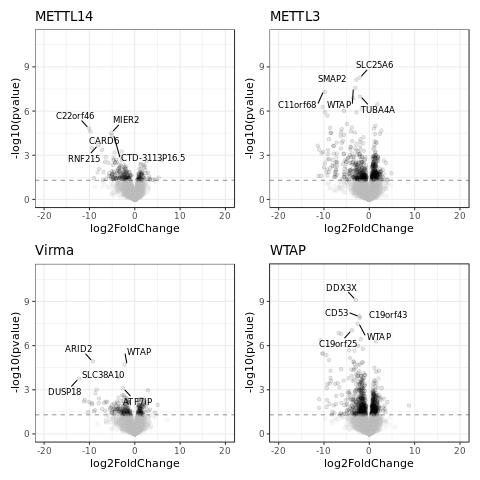

In [107]:
%%R
for (treat in c('METTL14','METTL3','Virma','WTAP')){
    res = all_res[[treat]]
    # significant thr 
    pvalue_lim = 0.05 #; log2FoldChange_lim = 5
    res$sig <- as.factor(
        res$pvalue < pvalue_lim
#         | (abs(res$log2FoldChange) > log2FoldChange_lim & res$pvalue < pvalue_lim)
    )
    relevel(res$sig, ref=TRUE)
#     ## Volcano plot
    vol[[treat]] = res %>% ggplot(aes(x=log2FoldChange, y=-log10(pvalue),colour=sig, fill=sig)) +
            geom_point(aes(color = sig),alpha = 1/10) +
            ggtitle(treat) +
            xlim(c(-20,20)) +
            ylim(c(0,11)) +
            geom_hline(yintercept=-log10(pvalue_lim), linetype="dashed", alpha = 4/10) +
#             geom_vline(xintercept=log2FoldChange_lim, linetype="dashed", alpha = 4/10) +
#             geom_vline(xintercept=(-1)*log2FoldChange_lim, linetype="dashed", alpha = 4/10) +
            scale_color_manual(values = c("grey", "black")) +
            theme_bw() + theme(legend.position="none") +
            geom_text_repel(
                data = subset(res[order(res$pvalue),], sig == TRUE)[1:5,],
                aes(label = name),
                size = 3,
                box.padding = unit(0.35, "lines"),
                point.padding = unit(0.3, "lines")
            )
}
v = vol$METTL14 + vol$METTL3 + vol$Virma + vol$WTAP
ggsave("plots/peak_Volcanos.png", plot = v, device = 'png', dpi = 300)
ggsave("plots/peak_Volcanos.pdf", plot = v, device = 'pdf', dpi = 300)
v

In [14]:
# %%R
# library(Gviz)
# library(Biostrings)
# library(rtracklayer)
# library(GenomicFeatures )

In [238]:
# %%R
# txdb <- makeTxDbFromGFF('/rumi/shams/genomes/hg38/gencode.v28.annotation.gtf',organism='Homo sapiens')

# %R bg_ip.treated 

# grtrack <- GeneRegionTrack(txdb, chromosome = chr, name = "Gene Model")
# gtrack <- GenomeAxisTrack()

# # %%R 
# # call_peaks('chr1')
# Tx <- transcripts(edb, filter = GeneNameFilter("BCL2L11"))

# # %%R
# peak_ploter <- function(treat,ymax, mins = rep(50,6), plus = rep(50,6), saveplot = '' ){
#     for (i in 1:6){
#         if (saveplot == 'pdf') pdf(paste("plots/hiv.",treat,'.',names(hiv_gr)[i],".pdf",sep=''), width=7, height=7, paper = "a4r")
#         if (saveplot == 'png') png(paste("plots/hiv.",treat,'.',names(hiv_gr)[i],".png",sep=''))
#         plotTracks(
#             list (gtrack, grtrack,
#                   get (paste('treated.s23', treat, sep ='.')),get(paste('treated.s24', treat, sep ='.')),
#                   get (paste('nontreated.s23', treat,sep ='.')),get(paste('nontreated.s24', treat,sep ='.'))
#                  ), 
#             type="l",
#             from=start(hiv_gr)[i] - mins[i], to=end(hiv_gr)[i] + plus[i] , ylim= c(-100,ymax[i]), 
#             main = paste(treat, names(hiv_gr)[i]),
#             add53=T,chromosome = "chr1",cex=1)
#         if (saveplot != '') dev.off() 
#     }
# }

[Wilcoxon signed rank test](http://www.sthda.com/english/wiki/one-sample-wilcoxon-signed-rank-test-in-r) amd t.test

[1] "METTL14"

	Wilcoxon signed rank test with continuity correction

data:  res$log2FoldChange
V = 13440000, p-value = 5.852e-05
alternative hypothesis: true location is less than 0


	One Sample t-test

data:  res$log2FoldChange
t = -12.325, df = 7526, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.1625452 -0.1179335
sample estimates:
 mean of x 
-0.1402393 

[1] "METTL3"

	Wilcoxon signed rank test with continuity correction

data:  res$log2FoldChange
V = 13260000, p-value = 8.452e-07
alternative hypothesis: true location is less than 0


	One Sample t-test

data:  res$log2FoldChange
t = -13.059, df = 7525, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.2367021 -0.1749132
sample estimates:
 mean of x 
-0.2058077 

[1] "Virma"

	Wilcoxon signed rank test with continuity correction

data:  res$log2FoldChange
V = 13526000, p-value = 0.0003431
alternative hypothesis: tru

R[write to console]: Saving 6.67 x 6.67 in image

R[write to console]: Saving 6.67 x 6.67 in image



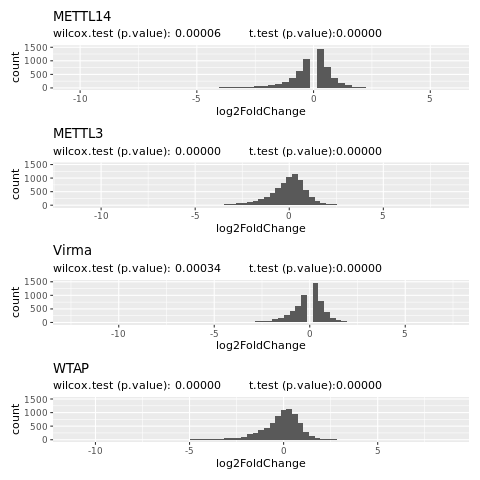

In [32]:
%%R
for (treat in c('METTL14','METTL3','Virma','WTAP')){
    res <- all_res[[treat]]
    d <- res$log2FoldChange[!is.na(res$log2FoldChange)]
    w <- wilcox.test(res$log2FoldChange,mu = 0, alternative = "less")
    
    t <- t.test(res$log2FoldChange, mu=0)

    print (treat)
    print (w)
    print (t)
    
    hist[[treat]] = ggplot(res, aes(x=log2FoldChange)) +
            ggtitle(
                treat, 
                sprintf("wilcox.test (p.value): %.5f \t t.test (p.value):%.5f", w$p.value, t$p.value)
            ) +
            ylim(c(-10,1500)) +
            geom_histogram(binwidth=0.3)
}
h = hist$METTL14 / hist$METTL3 / hist$Virma / hist$WTAP
ggsave("plots/peak_Histograms.png", plot = h, device = 'png', dpi = 300)
ggsave("plots/peak_Histograms.pdf", plot = h, device = 'pdf', dpi = 300)
h

## Pairwise correlation of each treatments 
http://www.sthda.com/english/wiki/correlation-matrix-a-quick-start-guide-to-analyze-format-and-visualize-a-correlation-matrix-using-r-software

In [59]:
%%R
library(Hmisc)
library(corrplot)
library(pheatmap)

In [56]:
%%R
all_fc = data.frame(
    METTL14 = all_res$METTL14$log2FoldChange,
    METTL3 = all_res$METTL3$log2FoldChange,
    Virma = all_res$Virma$log2FoldChange,
    WTAP = all_res$WTAP$log2FoldChange,
    row.names = rownames(all_res[[1]])
)
colSums(is.na(all_fc))

METTL14  METTL3   Virma    WTAP 
      2       3       2       2 


In [61]:
%%R
res2 <- rcorr(as.matrix(all_fc))
# # Extract the correlation coefficients
# res2$r
# # Extract p-values
# res2$P

pdf("plots/Corrplot.pdf", width=7, height=7)
c = corrplot(res2$r, type="upper", order="hclust", method="pie",
         p.mat = res2$P, sig.level = 0.01, insig = "blank")
dev.off()
png("plots/Corrplot.png")
c = corrplot(res2$r, type="upper", order="hclust", method="pie",
         p.mat = res2$P, sig.level = 0.01, insig = "blank")
dev.off()

png 
  2 


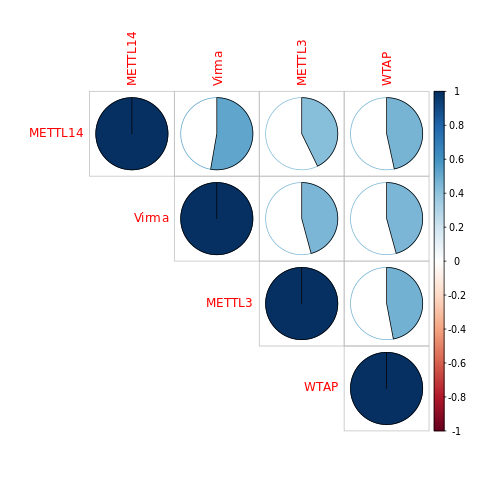

In [62]:
%%R
corrplot(
    res2$r, type="upper", 
    order="hclust", method="pie",
    p.mat = res2$P, sig.level = 0.01, insig = "blank")

R[write to console]: Saving 6.67 x 6.67 in image

R[write to console]: Saving 6.67 x 6.67 in image



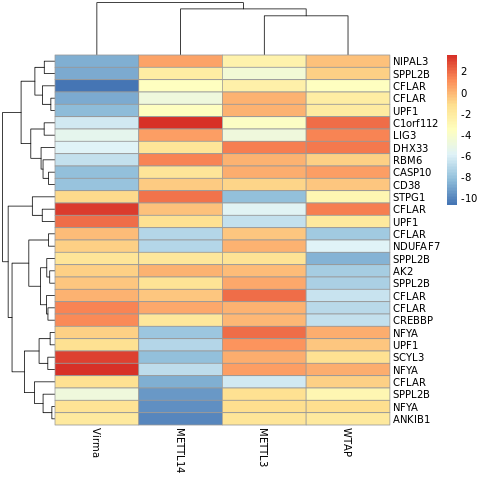

In [63]:
%%R
# mostVar Calculate the top n most variable genes in a matrix of gene expression data
# https://rdrr.io/github/abc-igmm/transcripTools/man/mostVar.html
mostVar <- function(data, n, i_want_most_var = TRUE) {
  data.var <- apply(data, 1, stats::var)
  data[order(data.var, decreasing = i_want_most_var)[1:n],] 
}
# scale - Z-Score
fc <- data.frame(apply(all_fc,2,scale, center=TRUE, scale=TRUE), row.names=rownames(all_fc))

# idtransfer
peak_ids = strsplit(rownames(all_fc), '_',)
ids = unlist(lapply(peak_ids, '[[', 1))

# filter most variable genes
fc = mostVar(fc,30)
# Plot heatmap
h1 <- pheatmap(fc, labels_row = gtf_df[ids,])
ggsave('plots/peak_mostVar_Heatmap.png', plot = h1, device = 'png', dpi = 300)
ggsave('plots/peak_mostVar_Heatmap.pdf', plot = h1, device = 'pdf', dpi = 300)

## iPAGE
Enrichment analysis 

In [95]:
%%bash --err error
declare -a StringArray=('METTL14' 'METTL3' 'Virma' 'WTAP')
for treat in "${StringArray[@]}"; do
    # ave duplicate: peaks  
    awk 'NR>1{arr[$1]   += $3; count[$1] += 1}END{for (a in arr) {print substr(a,1,15)"\t"arr[a]/count[a]}}' deseq/${treat}_peak_m6A_vs_input.txt > deseq/${treat}_peak_m6A_vs_input.ave.txt
    for f in `ls -d /flash/hani/bin/iPAGEv1.0/PAGE_DATA/ANNOTATIONS/human_ensembl*`; do
        base=`basename "$f"`
        perl $PAGEDIR/page.pl --expfile=deseq/${treat}_peak_m6A_vs_input.ave.txt \
        --species=$base --exptype=continuous --ebins=11 --nodups=1
        mv -v deseq/${treat}_peak_m6A_vs_input.ave.txt_PAGE/ ipage/${treat}_peak_m6A_vs_input_${base}/
    done
done

Reading expression data ... 1 by 7528... Done.
Creating hash ... Done
Reading GO names table ... entering
Done.
Reading GO index table ... entering
Done.
go_terms_num: 17689
Creating hash table for gene names in gene ontology index file ... Done.
gene num = 7509 out of 7528 
Creating hash table for gene ontology names ... Done.
Populating the GO profile table ... 7509	17689
Done.
Writing internal quantized groups ...Done
683 hits go_terms_num = 17689
cat 1329, mi = 0.00307518, regulation of inflammatory response
cat 1899, mi = 0.00302082, negative regulation of osteoblast differentiation
cat 658, mi = 0.00302004, Notch signaling pathway
cat 3519, mi = 0.00298433, SH3/SH2 adaptor activity
cat 1308, mi = 0.00288274, spindle pole
cat 327, mi = 0.00277679, positive regulation of nitric oxide biosynthetic process
cat 84, mi = 0.00275510, animal organ regeneration
cat 69, mi = 0.00272475, response to hypoxia
cat 1490, mi = 0.00268103, mitotic spindle pole
cat 1115, mi = 0.00259360, inositol 

In [138]:
%%bash --err error
declare -a StringArray=('METTL14' 'METTL3' 'Virma' 'WTAP')
for treat in "${StringArray[@]}"; do
    for f in `ls -d /flash/hani/bin/iPAGEv1.0/PAGE_DATA/ANNOTATIONS/human_ensembl*`; do
        base=`basename "$f"`        
        magick -density 300 \
        ipage/${treat}_peak_m6A_vs_input_${base}/${treat}_peak_m6A_vs_input.ave.txt.summary.pdf \
        -flatten -quality 90 plots/ipage.${treat}_peak_m6A_vs_input_${base}.png
    done
done
#         echo '<img src="plots/ipage.'${treat}_peak_m6A_vs_input_${base}.png'" style="height:300px">'

# TEISER
https://github.com/goodarzilab/TEISER

(RNA count files (input samples) made in the `internal_control` notebook). 

Hypo and Hyper-methylation gene set analysis: 

In [27]:
%%bash
mkdir -p teiser

declare -a StringArray=('METTL14' 'METTL3' 'Virma' 'WTAP')
for treat in "${StringArray[@]}"; do
    echo $treat
    # exp input 
    awk -F "\t" '{OFS=FS}NR>1{print substr($1,1,15), $3}' deseq/inputs_count_${treat}_vs_NT.txt | \
    awk '!seen[$1]++' > teiser/${treat}_vs_NT_log2FoldChange.txt
    # hyper_methylation gene list
    awk '$2>=1{print $1}' deseq/${treat}_peak_m6A_vs_input.ave.txt > teiser/${treat}_hyper_methylation.txt    
    perl $TEISERDIR/run_mi_gene_list.pl \
    --expfile=teiser/${treat}_vs_NT_log2FoldChange.txt \
    --genefile=teiser/${treat}_hyper_methylation.txt \
    --exptype=continuous \
    --ebins=7 \
    --species=human \
    --doremovedups=0 \
    --doremoveextra=0
    mv -v teiser/${treat}_vs_NT_log2FoldChange.txt_GENESET teiser/${treat}_hyper_methylation.txt_GENESET
    # hypo_methylation gene list
    awk '$2<1 {print $1}' deseq/${treat}_peak_m6A_vs_input.ave.txt > teiser/${treat}_hypo_methylation.txt
    perl $TEISERDIR/run_mi_gene_list.pl \
    --expfile=teiser/${treat}_vs_NT_log2FoldChange.txt \
    --genefile=teiser/${treat}_hypo_methylation.txt \
    --exptype=continuous \
    --ebins=7 \
    --species=human \
    --doremovedups=0 \
    --doremoveextra=0
    mv -v teiser/${treat}_vs_NT_log2FoldChange.txt_GENESET teiser/${treat}_hypo_methylation.txt_GENESET
done 

METTL14
The TEISERDIR environment variable is /flash/bin/TEISERv1.1
Sun Apr 26 07:53:17 UTC 2020
Remove duplicates, create teiser/METTL14_vs_NT_log2FoldChange.txt_GENESET/METTL14_vs_NT_log2FoldChange.txt
Quantizing the input file.
step 2: seed optimization.
Expfile loaded: 58335 values...
Adding small values...
Quantizing the input vector...Done
Number of clusters: 7
calculating the p-value matrix.
Allocating memory ... Done
doing stats: mi = 0.007387
pass = 0.000000
z = 170.107849
freq 0: 0.000120	1	8334	360	58335
freq 1: 0.000480	4	8334	360	58335
freq 2: 0.017519	146	8334	360	58335
freq 3: 0.004560	38	8334	360	58335
freq 4: 0.000000	0	8334	360	58335
freq 5: 0.019438	162	8334	360	58335
freq 6: 0.001080	9	8331	360	58335
step 7: drawing matrix.
Reading MI data ... Done.
Start drawing
0.52	-5.04
0
Outputing EPS file teiser/METTL14_vs_NT_log2FoldChange.txt_GENESET/METTL14_vs_NT_log2FoldChange.txt.summary.eps
Convert to PDF teiser/METTL14_vs_NT_log2FoldChange.txt_GENESET/METTL14_vs_NT_log2

Option suffix requires an argument
Option suffix requires an argument
Option suffix requires an argument
Option suffix requires an argument
Option suffix requires an argument
Option suffix requires an argument
Option suffix requires an argument
Option suffix requires an argument


In [28]:
%%bash --err error
declare -a StringArray=('METTL14' 'METTL3' 'Virma' 'WTAP')
for treat in "${StringArray[@]}"; do

    magick -density 300 \
    teiser/${treat}_hyper_methylation.txt_GENESET/*pdf \
    -flatten -quality 90 plots/teiser.${treat}_hyper_methylation_GENESET.png
    
    magick -density 300 \
    teiser/${treat}_hypo_methylation.txt_GENESET/*pdf \
    -flatten -quality 90 plots/teiser.${treat}_hypo_methylation_GENESET.png

    echo '<img src="'plots/teiser.${treat}_hypo_methylation_GENESET.png'" style="height:300px">'
    echo '<img src="'plots/teiser.${treat}_hyper_methylation_GENESET.png'" style="height:300px">'

done


<img src="plots/teiser.METTL14_hypo_methylation_GENESET.png" style="height:300px">
<img src="plots/teiser.METTL14_hyper_methylation_GENESET.png" style="height:300px">
<img src="plots/teiser.METTL3_hypo_methylation_GENESET.png" style="height:300px">
<img src="plots/teiser.METTL3_hyper_methylation_GENESET.png" style="height:300px">
<img src="plots/teiser.Virma_hypo_methylation_GENESET.png" style="height:300px">
<img src="plots/teiser.Virma_hyper_methylation_GENESET.png" style="height:300px">
<img src="plots/teiser.WTAP_hypo_methylation_GENESET.png" style="height:300px">
<img src="plots/teiser.WTAP_hyper_methylation_GENESET.png" style="height:300px">


### using bam to bed for cov count 

1. `intersectBed -split` make it work with bed12 file

3. make a intersect gtf to extract names for later. `

In [108]:
# %%bash 
# bamToBed -i bam/s23.human.METTL3.input.bam | intersectBed -s -split -wo -a - -b exomepeak/control/peak.bed | awk '{print $10}' | sort  tail

In [109]:
# %%bash 
# bamToBed -i bam/s23.human.METTL3.input.bam | intersectBed -s -split -wo -a - -b exomepeak/control/peak.bed \
# | cut -f10 | sort | uniq -c | awk '{ print $2 "\t" $1}' | head

In [89]:
%%R 
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.2 LTS

Matrix products: default
BLAS/LAPACK: /rumi/shams/abe/anaconda3/envs/deseq/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    tools     stats     graphics  grDevices
 [8] utils     datasets  methods   base     

other attached packages:
 [1] rtracklayer_1.40.6          data.table_1.11.6          
 [3] Rsamtools_1.32.3            Biostrings_2.48.0          
 [5] XVector_0.20.0              Gviz_1.24.0                
 [7] pheatmap_1.0.12             forcats_0.4.0              
 [9] stringr